In [2]:
import pandas as pd
from pandas import read_csv, read_excel
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import sklearn.metrics as skm
import os
import time
from glob import glob
import datetime
import random
from PIL import Image
from  tensorflow import keras
from  tensorflow.keras import layers
import base64

#### About the data
The “CC_Default.csv” dataset contains a total of 25 variables which are the following:


![image.jpeg](attachment:5560d594-96a1-41a9-8eac-408ea99eba98.jpeg)

In [7]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Please install GPU version of TF


In [8]:
# This connects your google drive to colab so the files on the drive can be accessed by colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#### **Task 1:**

Import the raw data (CC_Default.csv) into your Jupyter notebook.<br>

**1.1 Check if the data is loaded correctly by printing a few observations. Check the total number of observations and variables.**

In [ ]:
dataset = read_csv("/content/drive/My Drive/Colab_Notebooks/capstone/CC_Default.csv")

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
dataset.shape

(30000, 25)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# Check any of the categorical column contains irrelevent data
print("Sex: ",dataset.SEX.unique()) # Sex - 1,2
print("Education: ",dataset.EDUCATION.unique())
print("Marriage: ",dataset.MARRIAGE.unique())
print("PAY_0: ", dataset.PAY_0.unique())
print("PAY_2: ", dataset.PAY_2.unique())
print("PAY_3: ", dataset.PAY_3.unique())
print("PAY_4: ", dataset.PAY_4.unique())
print('default.payment.next.month '+ str(sorted(dataset['default.payment.next.month'].unique())))

Sex:  [2 1]
Education:  [2 1 3 5 4 6 0]
Marriage:  [1 2 3 0]
PAY_0:  [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2:  [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3:  [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4:  [-1  0 -2  2  3  4  5  7  6  1  8]
default.payment.next.month [0, 1]


### Explanation of value in each category.

**Sex** <br>

|Category|Description|
|----    |-----      |
|1       |Male       |
|2       |Female     |

**Education** <br>

| Category | Description     |   |   |   |
|----------|-----------------|---|---|---|
| 1        | graduate school |   |   |   |
| 2        | university      |   |   |   |
| 3        | high school     |   |   |   |
| 4        | others          |   |   |   |
| 5        | unknown         |   |   |   |
| 6        | unknown         |   |   |   |

**Marriage**

| Category | Description |   |   |   |
|----------|-------------|---|---|---|
| 0        | unknown     |   |   |   |
| 1        | Married     |   |   |   |
| 2        | Single      |   |   |   |
| 3        | Others      |   |   |   |

**Default payment next month**

|Category | Description|
|------   |--------    |
|0        | NO         |
|1        | YES        |

### DATA PROCESSING

The EDUCATION column has 7 unique values, but as per our data description, we have only 5 unique values, so we are going to club categories 0, 5, and 6 with category 5:

In [ ]:
fill = (dataset.EDUCATION == 0) | (dataset.EDUCATION == 6)

dataset.loc[fill, 'EDUCATION'] = 5

In [ ]:
print("Education: ",dataset.EDUCATION.unique())

Education:  [2 1 3 5 4]


Rename the PAY_0 column to PAY_1 to be consistent with other columns and default.payment.next.month to DEFAULT.

In [ ]:
dataset = dataset.rename(columns={'default.payment.next.month': 'DEFAULT','PAY_0': 'PAY_1'})

dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# Categorical variables description
dataset[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853767,1.551867
std,0.489129,0.784391,0.521970
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,5.000000,3.000000


**1.2 Provide the descriptive statistics and manipulate data.**

A) Check for missing values if any.<br>
B) Plot the univariate distribution.<br>
C) Convert the relevant variables such as payment variables (Pay0-Pay6 and customer related variables) to categorical variables as appropriate.

In [ ]:
df_missing = dataset

In [ ]:
df_missing.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
for c in df_missing.columns:
    miss = df_missing[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has NO missing value!".format(c))

ID has NO missing value!
LIMIT_BAL has NO missing value!
SEX has NO missing value!
EDUCATION has NO missing value!
MARRIAGE has NO missing value!
AGE has NO missing value!
PAY_1 has NO missing value!
PAY_2 has NO missing value!
PAY_3 has NO missing value!
PAY_4 has NO missing value!
PAY_5 has NO missing value!
PAY_6 has NO missing value!
BILL_AMT1 has NO missing value!
BILL_AMT2 has NO missing value!
BILL_AMT3 has NO missing value!
BILL_AMT4 has NO missing value!
BILL_AMT5 has NO missing value!
BILL_AMT6 has NO missing value!
PAY_AMT1 has NO missing value!
PAY_AMT2 has NO missing value!
PAY_AMT3 has NO missing value!
PAY_AMT4 has NO missing value!
PAY_AMT5 has NO missing value!
PAY_AMT6 has NO missing value!
DEFAULT has NO missing value!


**B) Univariate analysis**

Univariate analysis is the simplest form of analysis where we analyze each feature (that is, each column of a DataFrame) and try to uncover the pattern or distribution of the data.

In univariate analysis, we will be analyzing the categorical columns **(DEFAULT, SEX, EDUCATION, and MARRIAGE)** to mine useful information about the data:

i) The **Default** column:

<Axes: xlabel='DEFAULT', ylabel='count'>

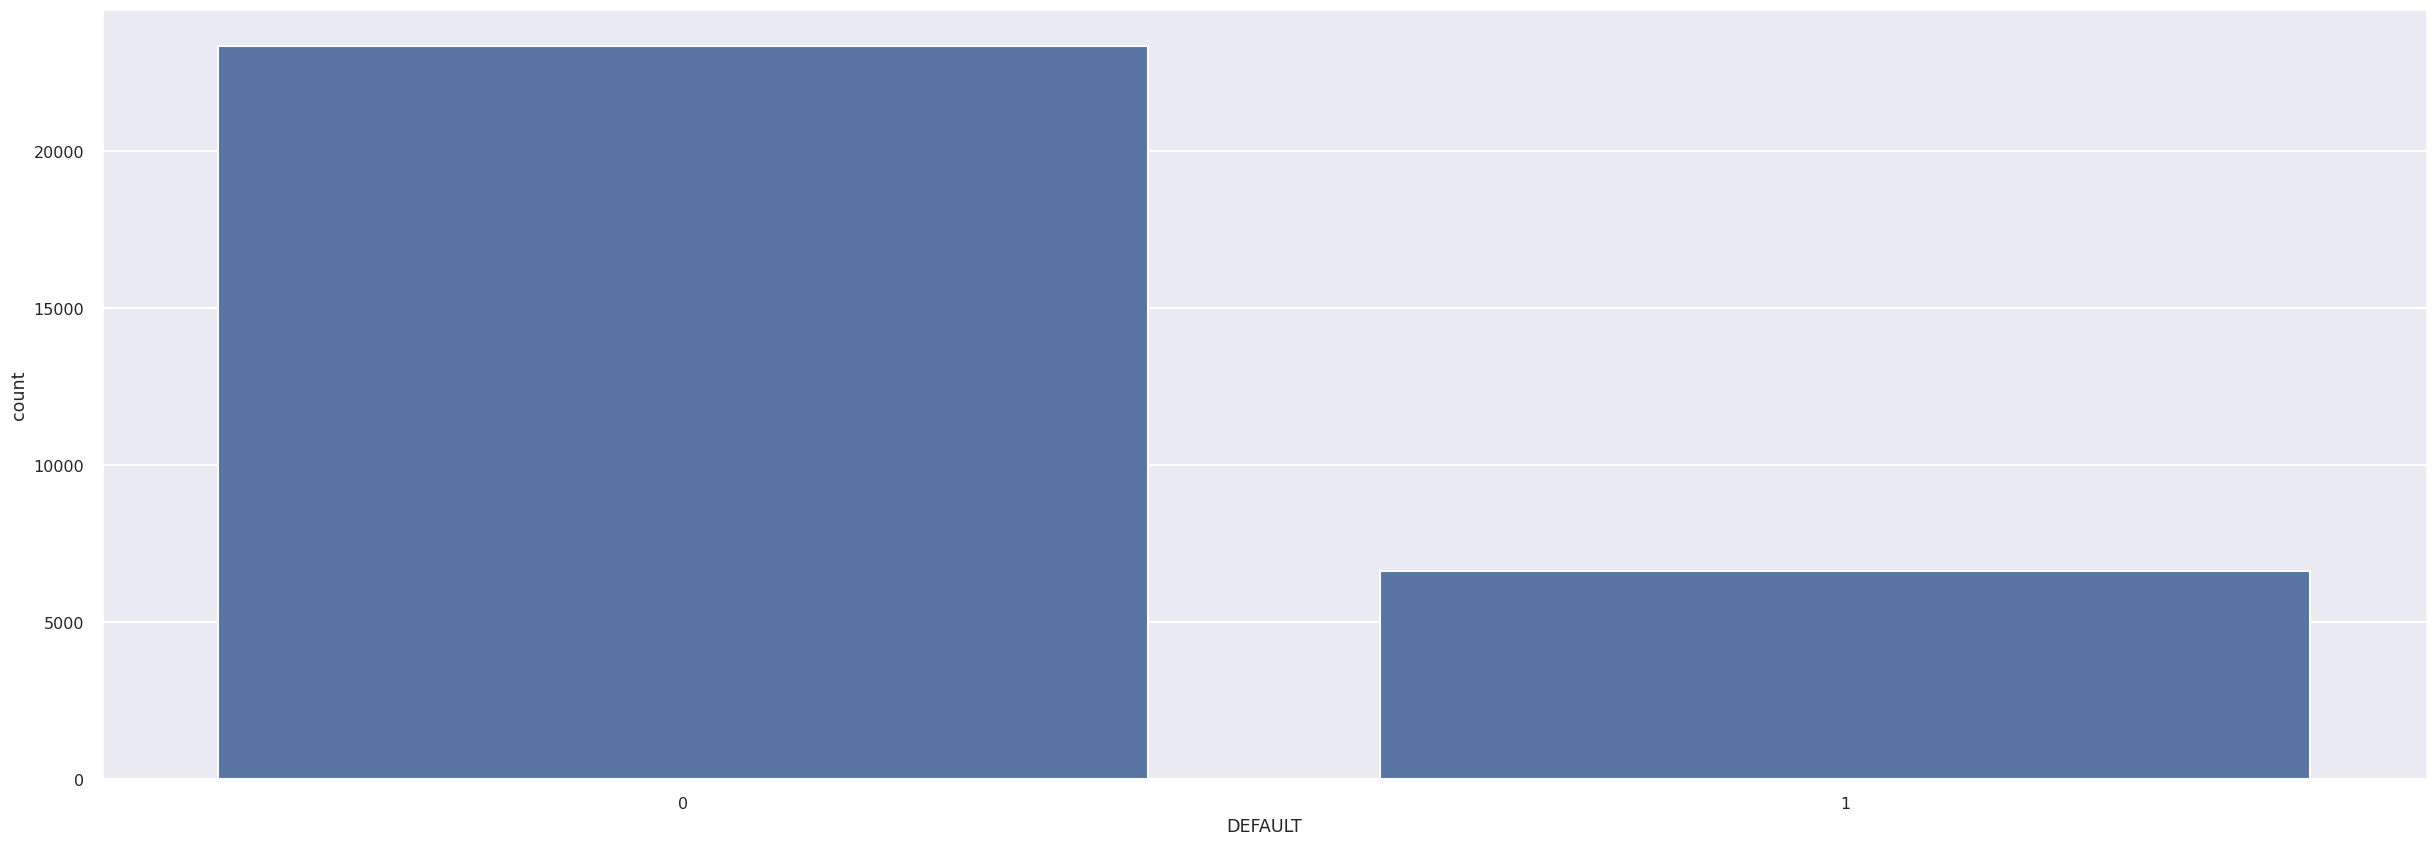

In [ ]:
sns.countplot(x="DEFAULT", data=dataset)

To analyze the distribution of the DEFAULT column, that is, the count of defaults versus non-defaults, use the following:

In [ ]:
dataset.DEFAULT.value_counts()

,count
DEFAULT,
0,23364
1,6636


ii) **Gender** :

<Axes: title={'center': 'Gender count'}, xlabel='SEX'>

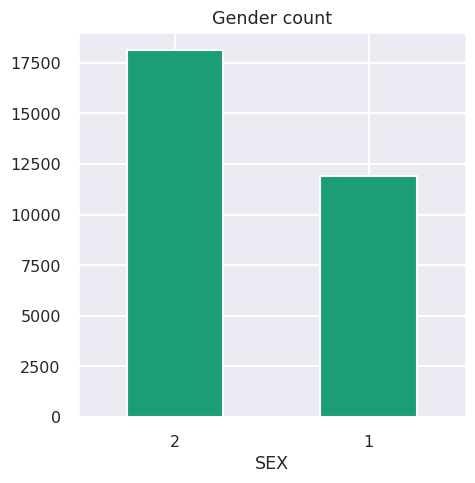

In [ ]:
# Count the number of gender
dataset.SEX.value_counts().plot(kind = 'bar',figsize=(5,5),rot=0,colormap='Dark2',title="Gender count")

Count of Female vs Male , (Male - 1, Female - 2):

In [ ]:
dataset.SEX.value_counts()

,count
SEX,
2,18112
1,11888


iii) The **EDUCATION** column :

<Axes: xlabel='EDUCATION', ylabel='count'>

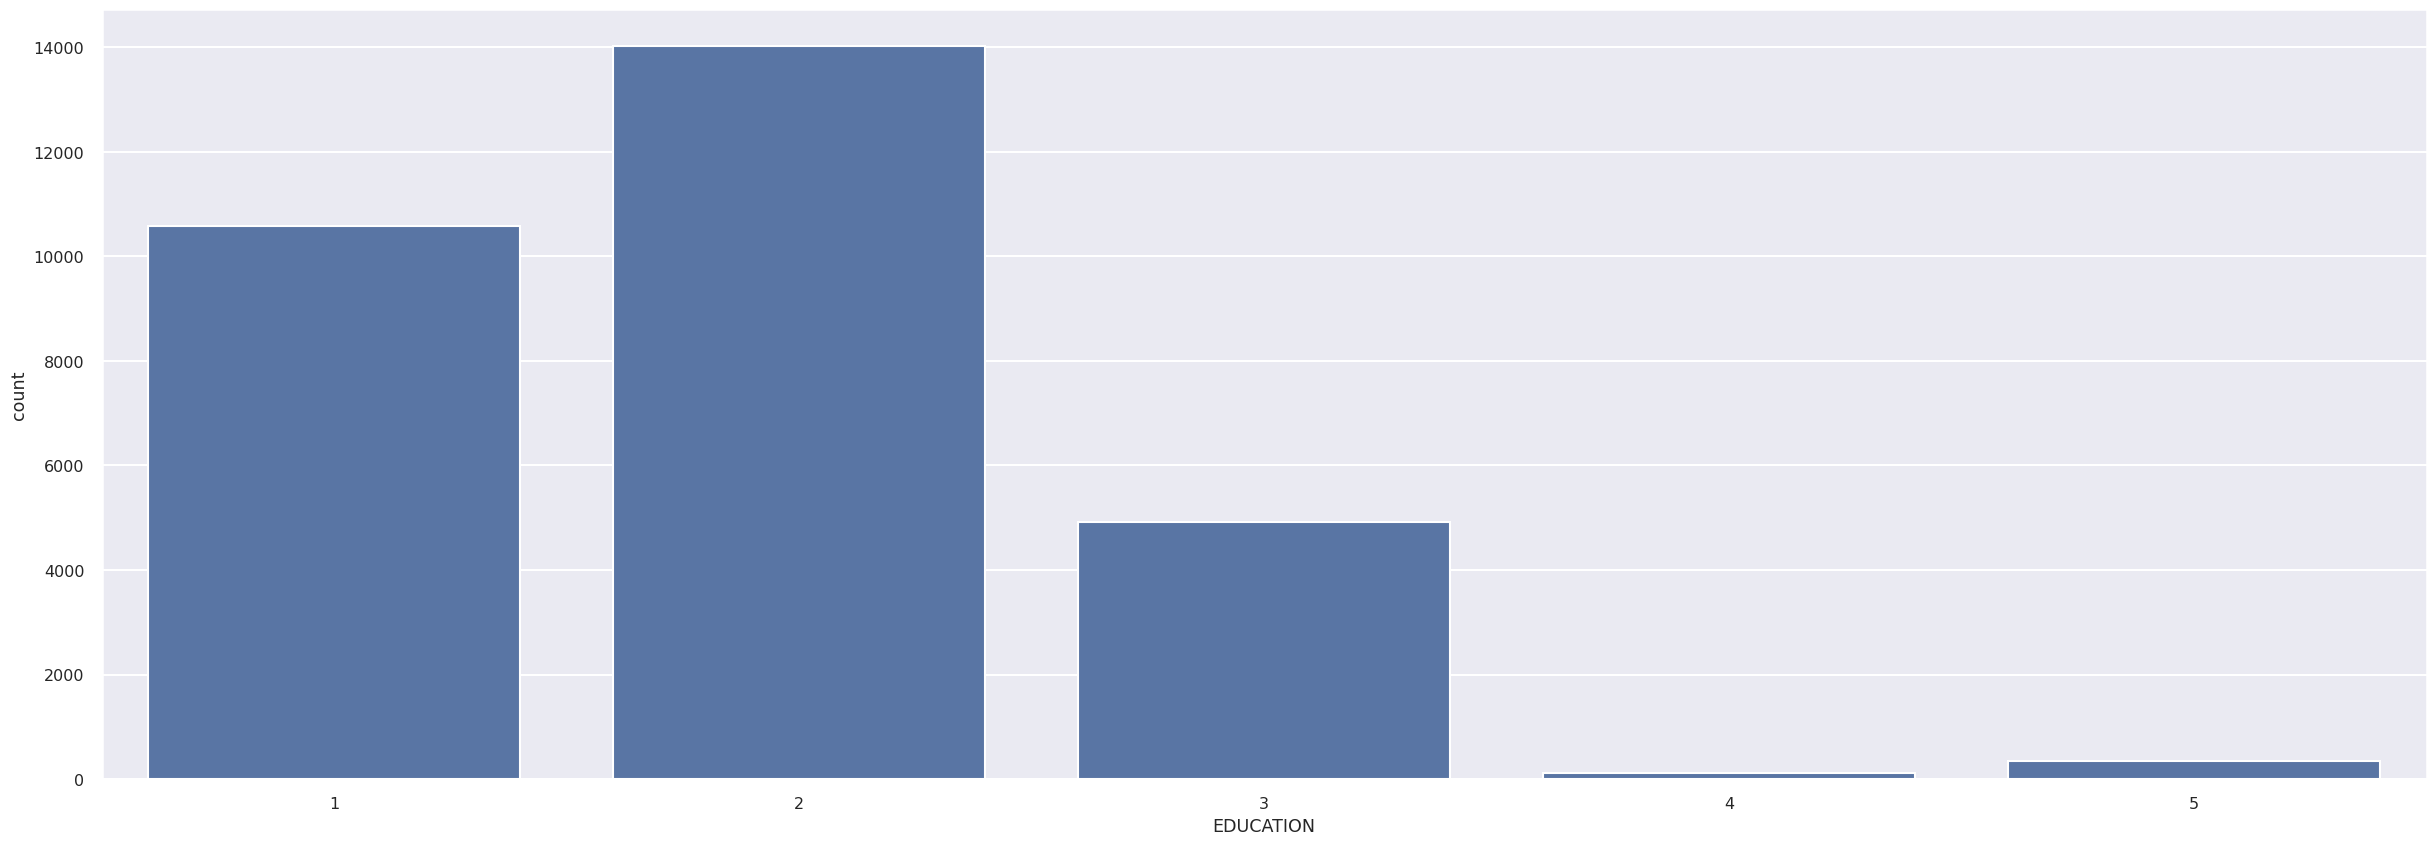

In [ ]:
sns.countplot(x = "EDUCATION", data = dataset)

In [ ]:
dataset.EDUCATION.value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
5,345
4,123


iv) The **MARRIAGE** column :

<Axes: xlabel='MARRIAGE', ylabel='count'>

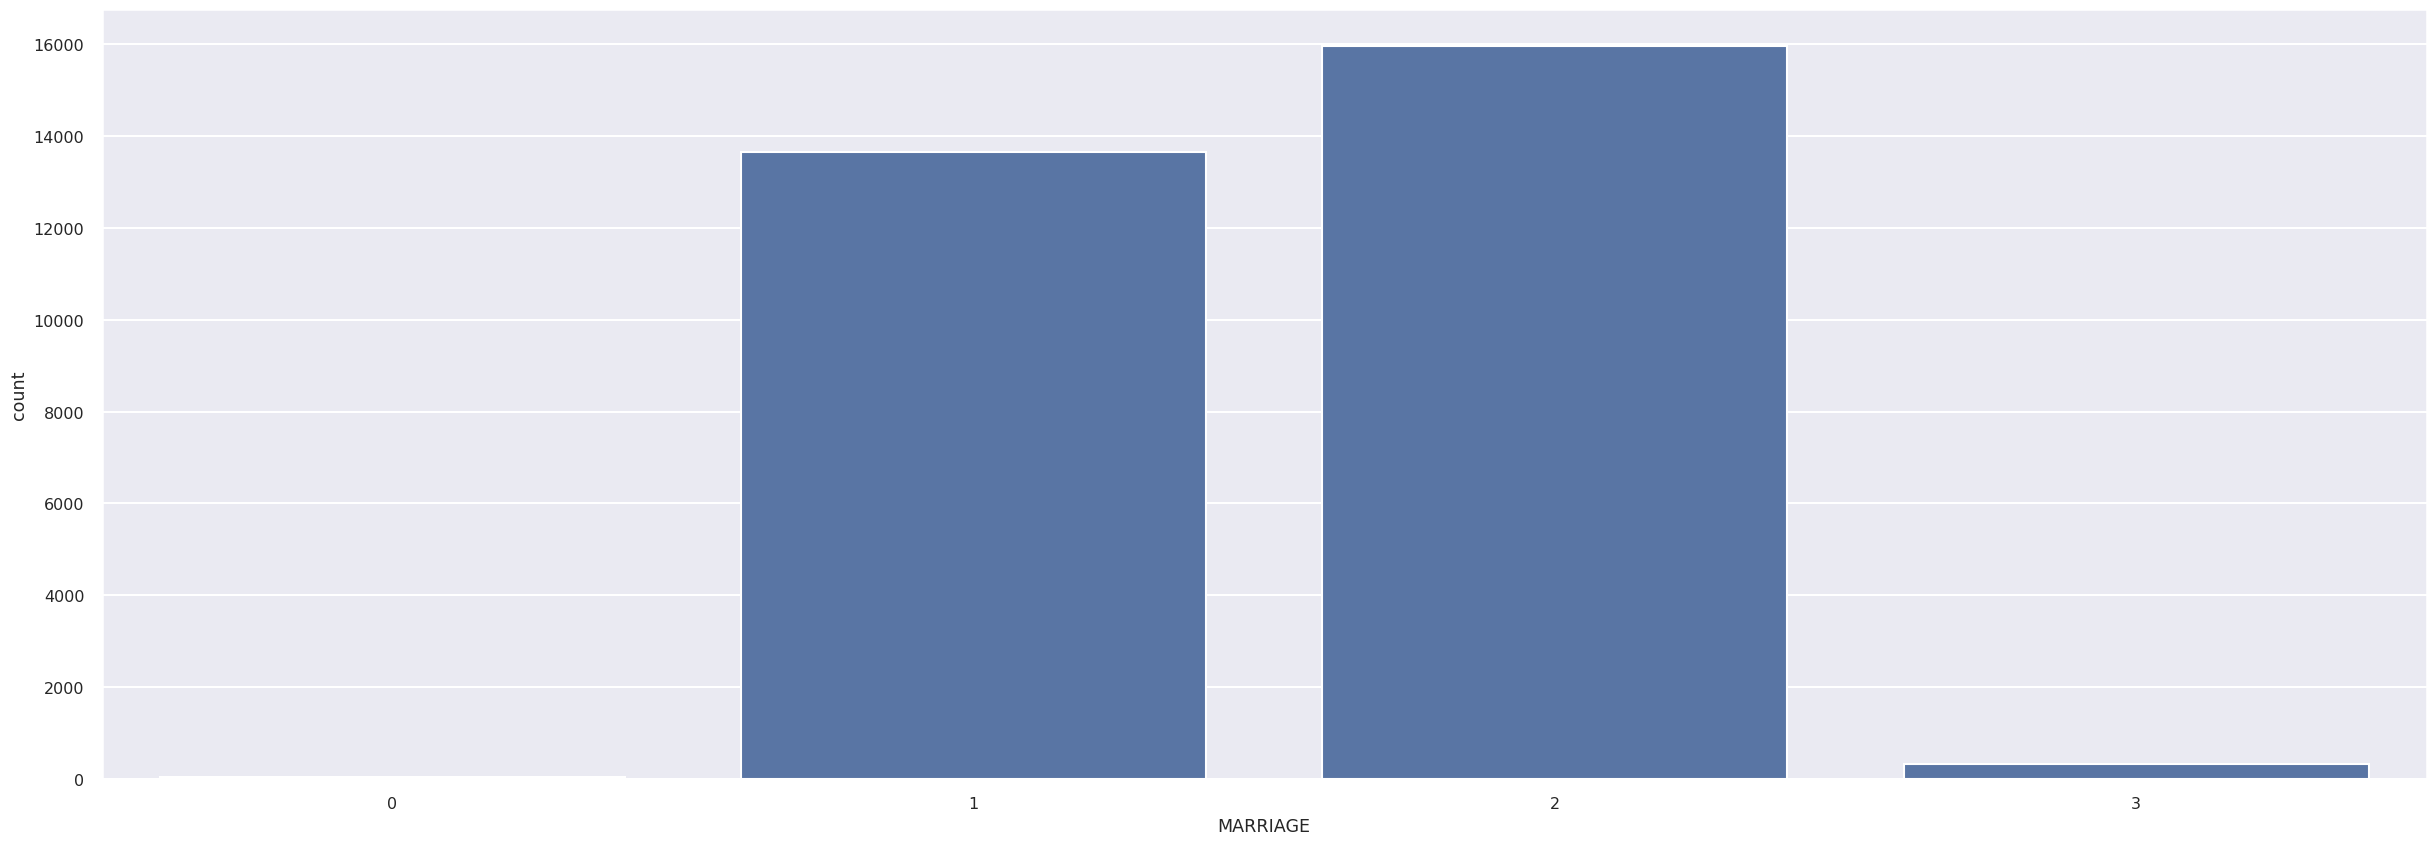

In [ ]:
sns.countplot(x = 'MARRIAGE', data = dataset)

In [ ]:
dataset.MARRIAGE.value_counts()

,count
MARRIAGE,
2,15964
1,13659
3,323
0,54


<Axes: xlabel='AGE', ylabel='Count'>

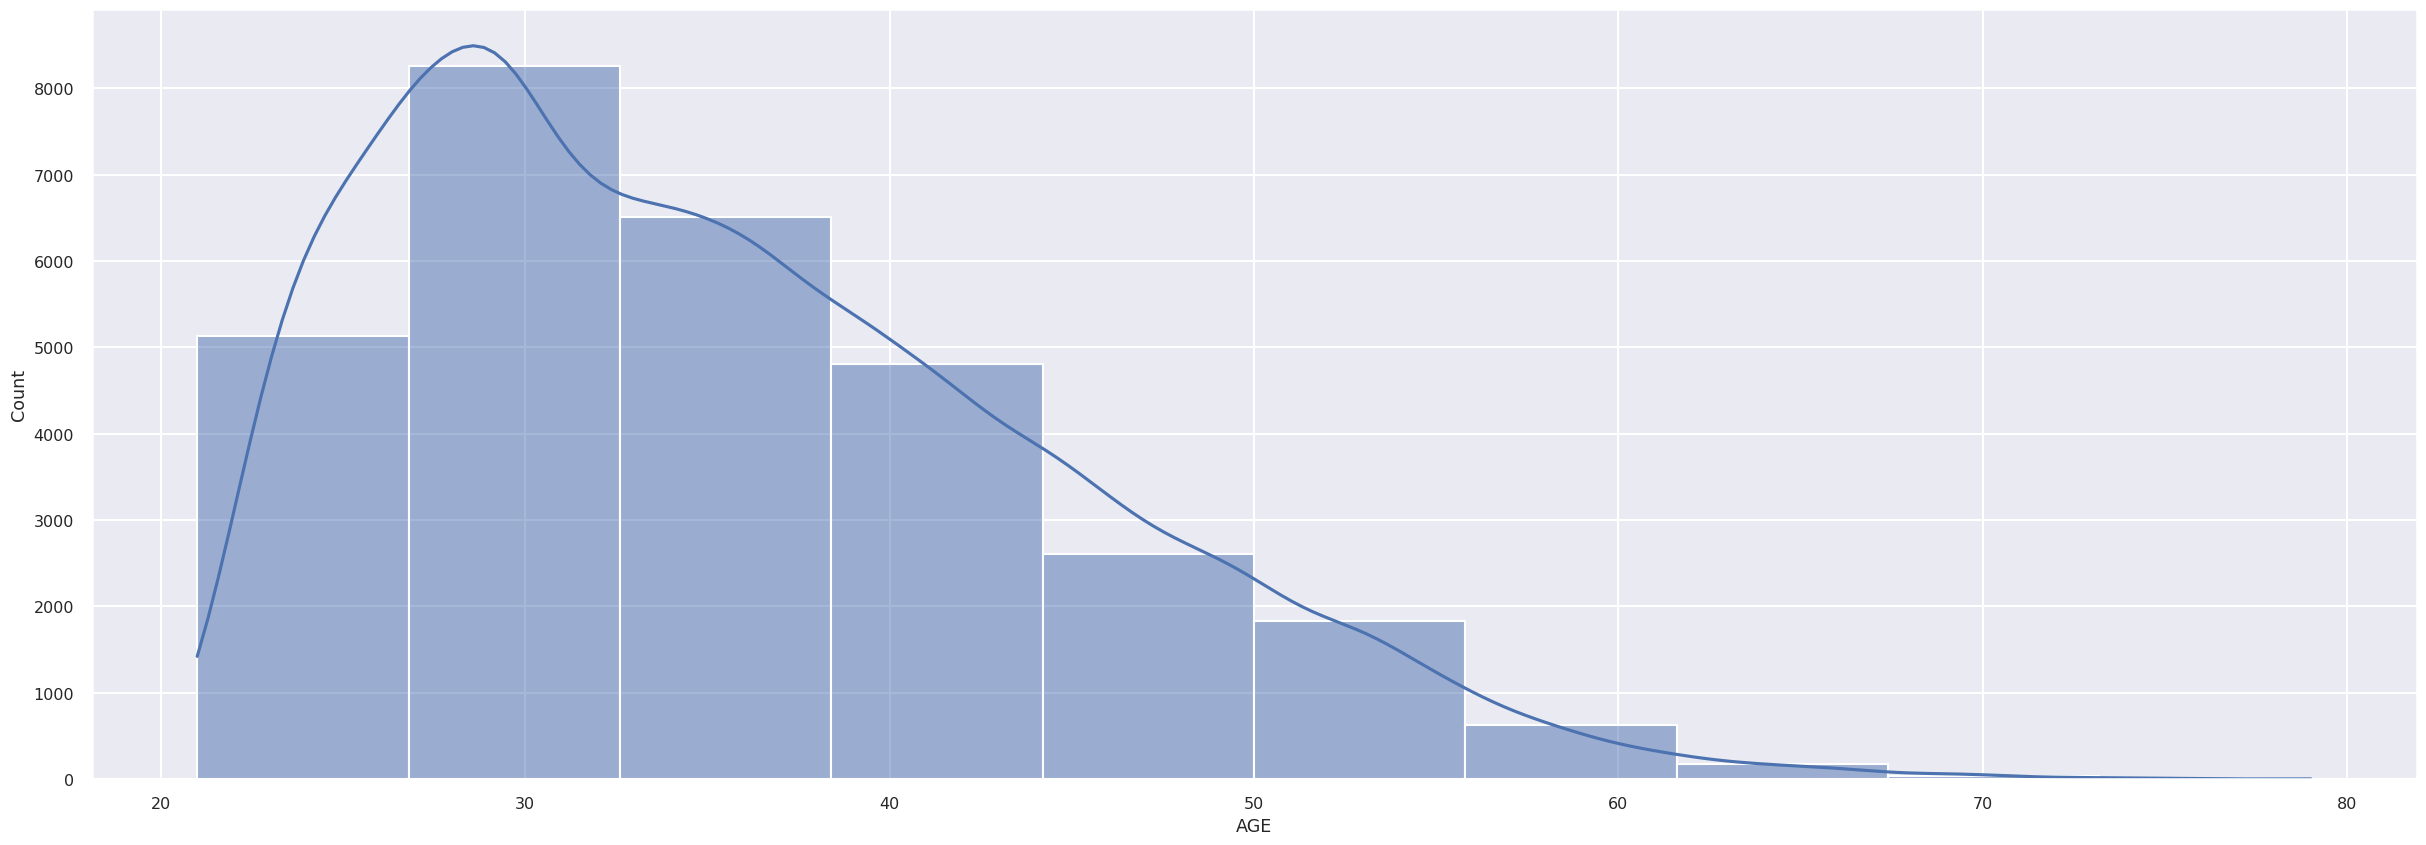

In [ ]:
# age distribution
sns.histplot(x = 'AGE',data = dataset,bins=10, kde = True)

**1.3 Find the variables that are correlated and the variables that might help in finding the defaulters next month using a few plots. The plots should provide insights on the following:**

A) The independent variable that should help identify those who will default from the next month’s credit card payment.<br>
B) The relation between dependent and independent variables. <br>
C) The correlations among the variables, etc.

In this section, we will consider the relationship between the DEFAULT column and other columns in the DataFrame /
with the help of the crosstab function and visualization techniques.

**i) The SEX column vs DEFAULT :**

<Axes: xlabel='SEX', ylabel='count'>

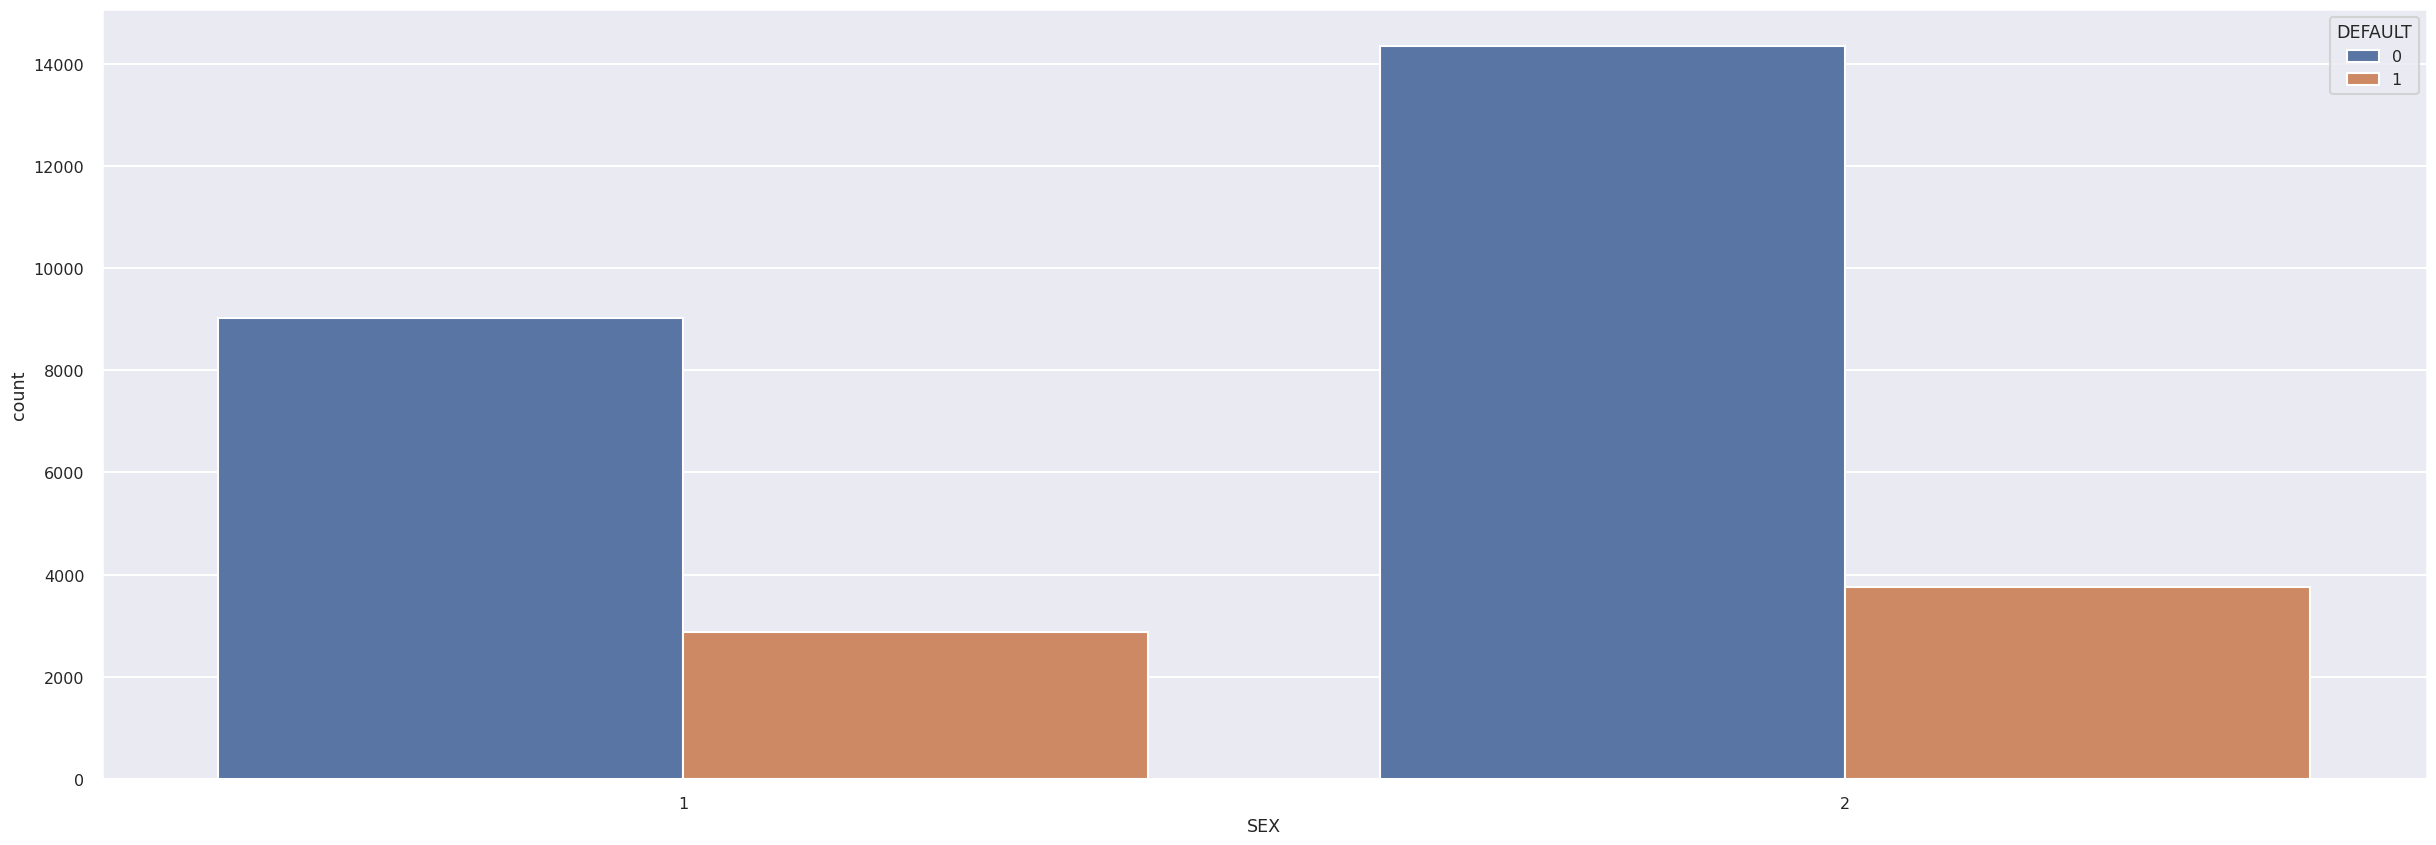

In [ ]:
#sns.set(rc={'figure.figsize':(10,5)})

sns.countplot(x='SEX', hue='DEFAULT', data=dataset)

#edu.set_xticklabels(['Male','Female'])

#plt.show()

From the above graph we can see that Females have defaulted more than Male. Cross tab can be used to find the
percenatge of defaulters.

In [ ]:
pd.crosstab(dataset.SEX,dataset.DEFAULT,normalize = 'index')

DEFAULT,0,1
SEX,,
1,0.758328,0.241672
2,0.792237,0.207763


ii) **EDUCATION vs DEFAULT :**

<Axes: xlabel='EDUCATION', ylabel='count'>

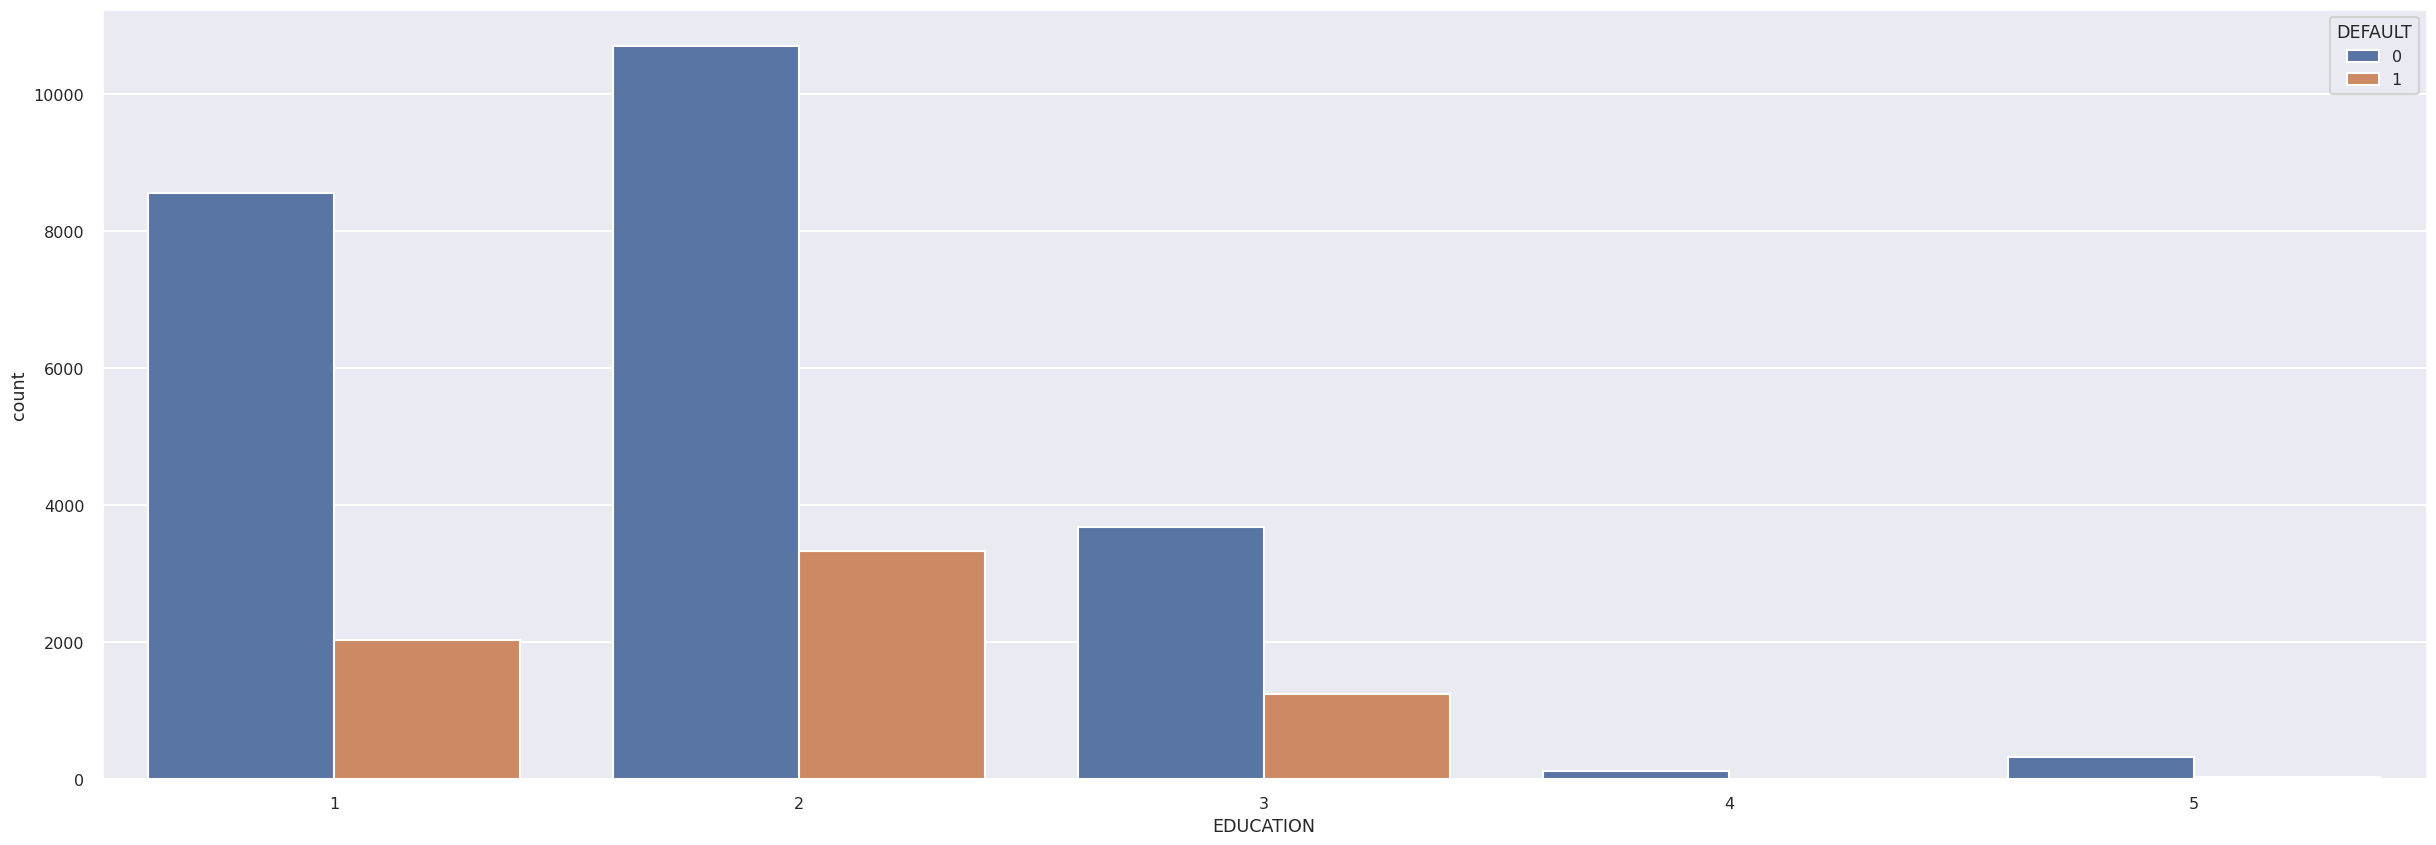

In [ ]:
#sns.set(rc={'figure.figsize':(15,10)})

sns.countplot(x='EDUCATION', hue='DEFAULT', data=dataset)

#edu.set_xticklabels(['Graduate School','University','High School','Other','Unknown'])

#plt.show()

In [ ]:
pd.crosstab(dataset.EDUCATION,dataset.DEFAULT, normalize = 'index')

DEFAULT,0,1
EDUCATION,,
1,0.807652,0.192348
2,0.762651,0.237349
3,0.748424,0.251576
4,0.943089,0.056911
5,0.924638,0.075362


iii ) **MARRIAGE vs DEFAULT**

<Axes: xlabel='MARRIAGE', ylabel='count'>

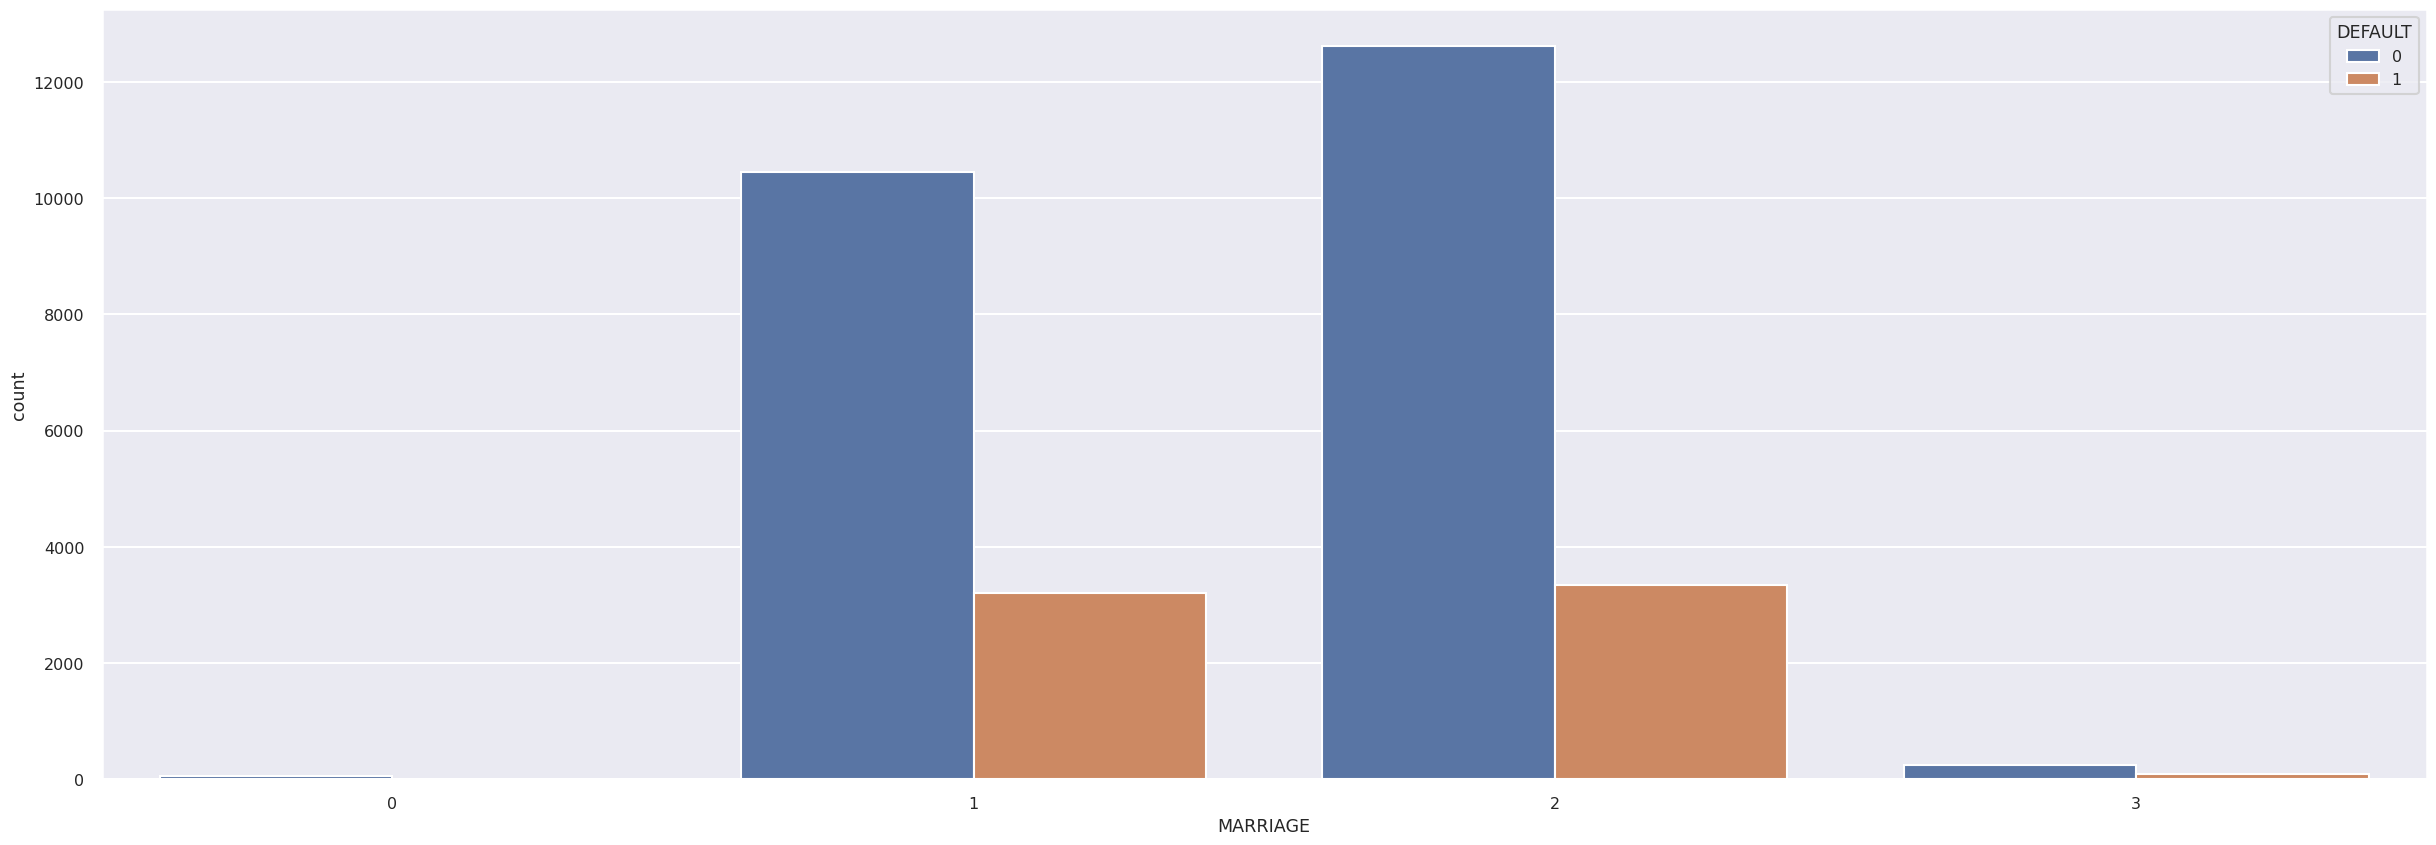

In [ ]:
sns.countplot(x="MARRIAGE", hue='DEFAULT', data=dataset)

In [ ]:
pd.crosstab(dataset.MARRIAGE,dataset.DEFAULT, normalize = 'index')

DEFAULT,0,1
MARRIAGE,,
0,0.907407,0.092593
1,0.765283,0.234717
2,0.790717,0.209283
3,0.739938,0.260062


**PAY_1 vs DEFAULT**

In [ ]:
pd.crosstab(dataset.PAY_1,dataset.DEFAULT)

DEFAULT,0,1
PAY_1,,
-2,2394,365
-1,4732,954
0,12849,1888
1,2436,1252
2,823,1844
3,78,244
4,24,52
5,13,13
6,5,6


**BALANCE vs DEFAULT**

In this section, we will be looking at the relationship between the LIMIT_BAL column and the DEFAULT column

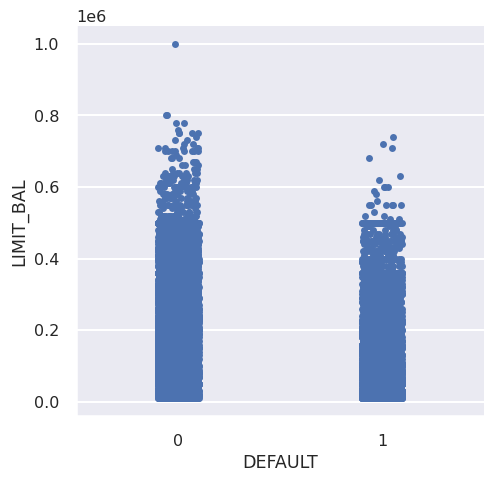

In [ ]:
sns.catplot(x="DEFAULT", y="LIMIT_BAL", jitter=True, data=dataset)

From the preceding plot, we can infer that customers with higher balances have a lower likelihood
of default than customers with lower balance amounts.

**AGE vs DEFAULT**

We will evaluate the relationship between the AGE and DEFAULT columns using the crosstab function.
Our main objective is to find out which age group has the highest default rate.


In [ ]:
pd.crosstab(dataset.AGE,dataset.DEFAULT)

DEFAULT,0,1
AGE,,
21,53,14
22,391,169
23,684,247
24,827,300
25,884,302
26,1003,253
27,1164,313
28,1123,286
29,1292,313


As you can see, the age groups with the highest count of defaults are 27 and 29.<br>
To determine which age group has the highest default percentage, <br>
perform cross-tabulation with normalize= 'Index':

In [ ]:
pd.crosstab(dataset.AGE,dataset.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
AGE,,
21,0.791045,0.208955
22,0.698214,0.301786
23,0.734694,0.265306
24,0.733807,0.266193
25,0.745363,0.254637
26,0.798567,0.201433
27,0.788084,0.211916
28,0.797019,0.202981
29,0.804984,0.195016


From the preceding output, we can see that even though the ages 27 and 29 had higher counts of defaults,<br>
the percentage-wise default count paints a different picture. <br>
Those customers of the age of 22 had a higher percentage of defaulters than non-defaulters.

#### CORRELATION
Correlation measures the degree of dependency between any two variables.

The value of a correlation coefficient can vary between -1 to 1, with 1 being a strong positive correlation and -1 a strong negative correlation.

In this section, we will be using Spearman's rank correlation to check the correlation between two variables. <br>
The main reason for using Spearman's rank correlation is that it does not assume that the data is normally distributed,
and it can be used between ordinal variables.

We will analyze the correlation of the DEFAULT column with the other remaining columns of the DataFrame and visualize
the analysis using a heatmap. By finding the correlation between these and the DEFAULT column,
you can determine which features have a higher impact on the DEFAULT column and whether that impact is positive or negative.

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})

sns.set_context("talk", font_scale=0.7)

<Axes: >

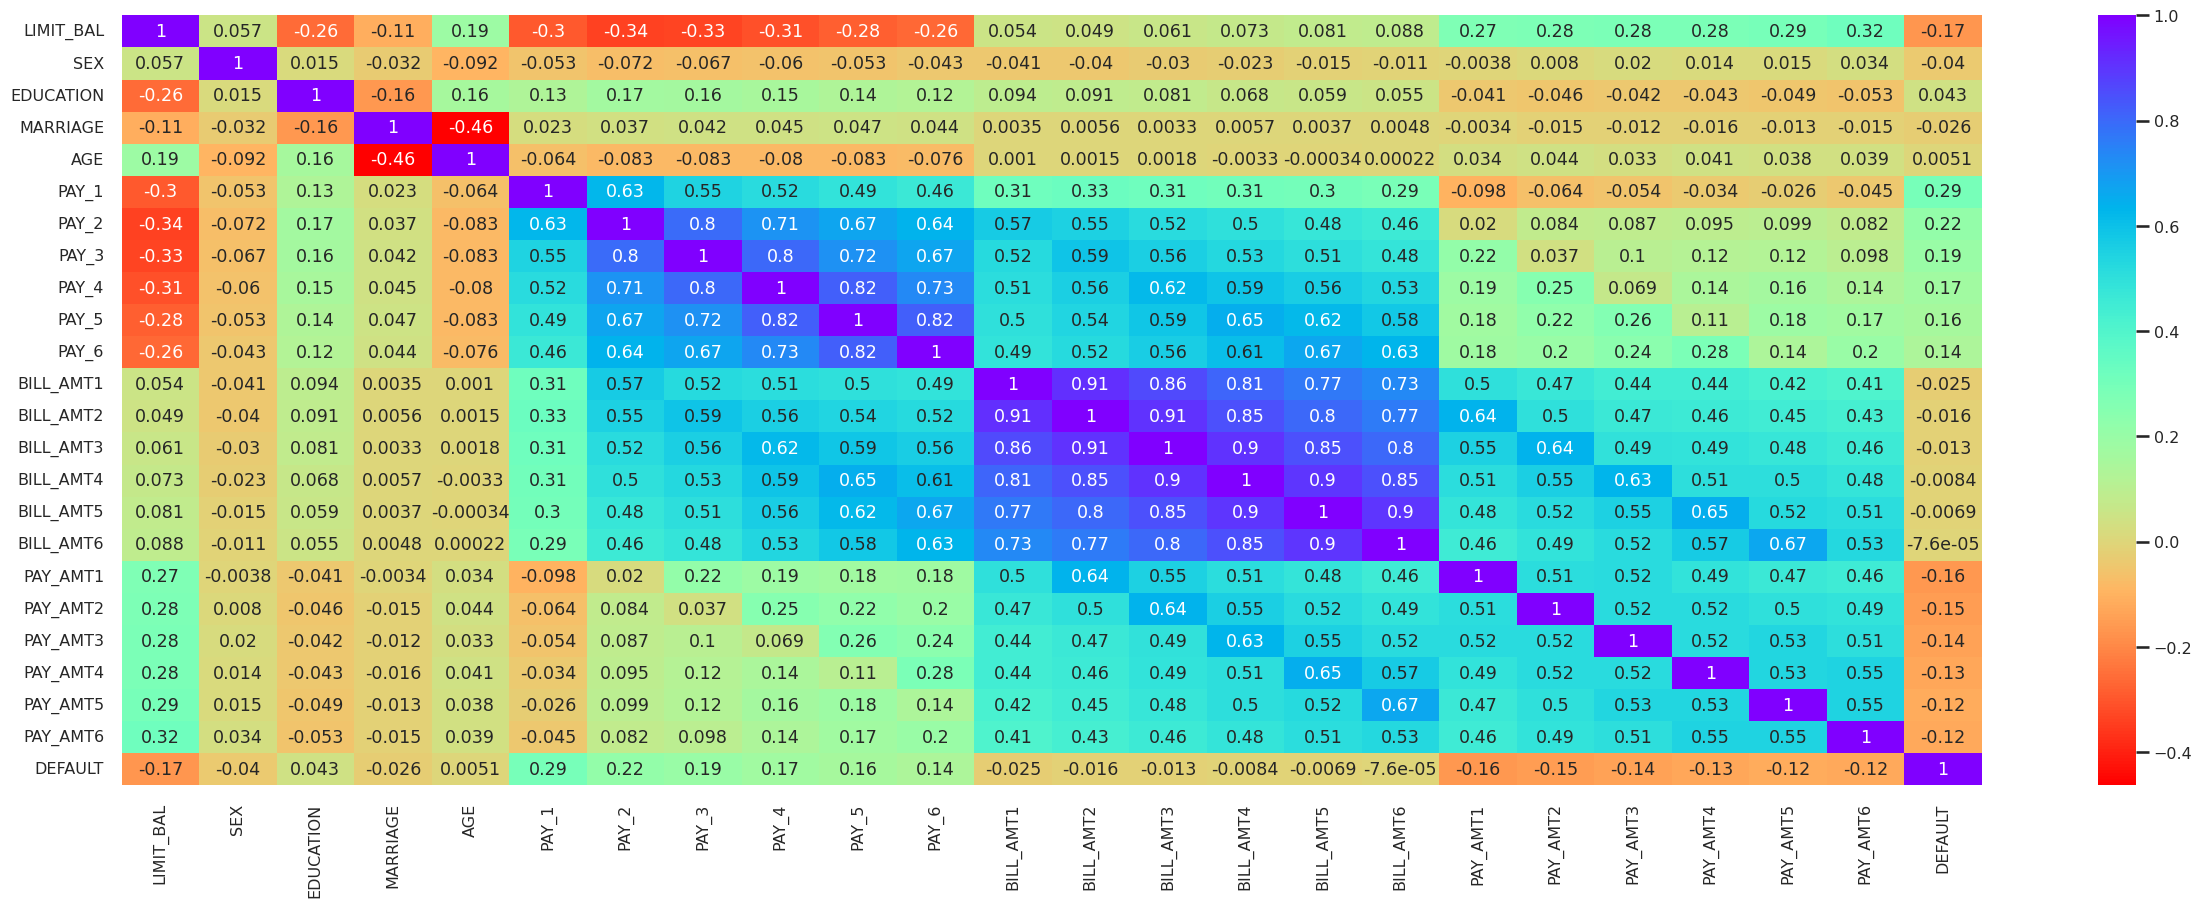

In [ ]:
sns.heatmap(dataset.iloc[:,1:].corr(method='spearman'),cmap='rainbow_r', annot=True)

In order to get the exact correlation coefficients of each column with the DEFAULT column, <br>
apply the .corr() function on each column with respect to the DEFAULT column:

In [ ]:
dataset.drop("DEFAULT", axis=1).apply(lambda x: x.corr(dataset.DEFAULT,method='spearman'))

,0
ID,-0.013952
LIMIT_BAL,-0.169586
SEX,-0.039961
EDUCATION,0.043429
MARRIAGE,-0.026490
AGE,0.005149
PAY_1,0.292213
PAY_2,0.216919
PAY_3,0.194771
PAY_4,0.173690


**1.4 Provide your insights on the variables and the relationship among the variables <br>
based on your analysis in Task 1.3 in a markdown cell in your Jupyter notebook**

### Summary

#### Building a Profile of a High-Risk Customer
Based on the analysis performed in the previous sections, we can identify a customer who is most likely to default.<br>

The customer who satisfies the majority of the following conditions can be classified as a high-risk customer.<br>
A high-risk customer is one who has a higher probability of default:

1. A male customer is more likely to default than a female customer.
2. People with a relationship status of other are more likely to default than married or single people.
3. A customer whose highest educational qualification is a high-school diploma is more likely to default than a customer who has gone to graduate school or university.
4. A customer who has delayed payment for 2 consecutive months has a higher probability of default.
5. A customer who is 22 years of age has a higher probability of defaulting on payments than any other age group.

### Task 2:

Import “Train.csv” into your Jupyter notebook.

2.1 Check the total number of observations and print a few records. Please note that the variable conversion in the raw data, similar to Task 1.2 should be applied

Hint: Convert the relevant variables such as payment variables, Pay0-Pay6, and customer related variables (demographic) to categorical variables as appropriate.

2.2 Fit a logistic regression after making the dataset balanced.

Hint: Use class weight parameter.

2.3 Remove the variable(s) that would cause multicollinearity. Explicitly state the variable(s) that you are dropping in a markdown cell in your Jupyter notebook.

Hint: To remove a variable, use the drop function.


Import “Test.csv” into your Jupyter notebook.

2.4 Test the model on the test dataset. Please note that the variable conversion in the raw data, similar to Task 1.2 should be applied.

Hint: Convert the relevant variables such as payment variables, Pay0-Pay6, and customer related variables (demographic) to categorical variables as appropriate.

2.5 Plot the confusion matrix.

2.6 Provide your insights on accuracy, precision and F1 Score in a markdown cell in your Jupyter notebook.

In [8]:
train_data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/capstone/Train.csv')

In [9]:
train_data.shape

(26000, 25)

In [10]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,26000.0,14996.430462,8663.219017,2.0,7479.75,14969.5,22500.25,30000.0
LIMIT_BAL,26000.0,167440.846154,129672.200019,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,26000.0,1.603654,0.489147,1.0,1.00,2.0,2.00,2.0
EDUCATION,26000.0,1.853692,0.794793,0.0,1.00,2.0,2.00,6.0
MARRIAGE,26000.0,1.552000,0.521830,0.0,1.00,2.0,2.00,3.0
AGE,26000.0,35.492115,9.208619,21.0,28.00,34.0,41.00,79.0
PAY_0,26000.0,-0.014846,1.120603,-2.0,-1.00,0.0,0.00,8.0
PAY_2,26000.0,-0.133308,1.196524,-2.0,-1.00,0.0,0.00,8.0
PAY_3,26000.0,-0.165154,1.195702,-2.0,-1.00,0.0,0.00,8.0
PAY_4,26000.0,-0.218808,1.167831,-2.0,-1.00,0.0,0.00,8.0


In [11]:
# Convert demographic and payment-related variables to categorical data
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Convert columns to categorical types
train_data[categorical_columns] = train_data[categorical_columns].astype('category')

# Verify the changes
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         26000 non-null  int64   
 1   LIMIT_BAL  26000 non-null  int64   
 2   SEX        26000 non-null  category
 3   EDUCATION  26000 non-null  category
 4   MARRIAGE   26000 non-null  category
 5   AGE        26000 non-null  int64   
 6   PAY_0      26000 non-null  category
 7   PAY_2      26000 non-null  category
 8   PAY_3      26000 non-null  category
 9   PAY_4      26000 non-null  category
 10  PAY_5      26000 non-null  category
 11  PAY_6      26000 non-null  category
 12  BILL_AMT1  26000 non-null  int64   
 13  BILL_AMT2  26000 non-null  float64 
 14  BILL_AMT3  26000 non-null  float64 
 15  BILL_AMT4  26000 non-null  float64 
 16  BILL_AMT5  26000 non-null  float64 
 17  BILL_AMT6  26000 non-null  float64 
 18  PAY_AMT1   26000 non-null  float64 
 19  PAY_AMT2   26000 non-null

In [12]:
train_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,2,120000,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,4,50000,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
2,5,50000,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
3,6,50000,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
4,7,500000,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


**2.2 Balancing the Dataset & Fitting Logistic Regression**

*Step 3: Balance the Dataset* <br>
To balance the dataset, we can use class_weight='balanced' while fitting the logistic regression model, which helps account for class imbalance.

First, split the dataset into features (X) and target (y).

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = train_data.drop('Default', axis=1)
y = train_data['Default']

# Split the dataset into training and test sets (for internal validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features (you can exclude categorical ones, if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print(X_train_scaled.shape)
print(X_val_scaled.shape)

(18200, 24)
(7800, 24)


*Step 4: Fit Logistic Regression Model* <br>
Use class_weight='balanced' to deal with class imbalance.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize logistic regression model with balanced class weights
logreg = LogisticRegression(class_weight='balanced', random_state=42)

# Fit the model
logreg.fit(X_train_scaled, y_train)

# Predict on validation set
y_pred_val = logreg.predict(X_val_scaled)

# Evaluate the model
print(classification_report(y_val, y_pred_val))



              precision    recall  f1-score   support

           0       0.87      0.72      0.79      6098
           1       0.38      0.62      0.47      1702

    accuracy                           0.70      7800
   macro avg       0.63      0.67      0.63      7800
weighted avg       0.77      0.70      0.72      7800



**2.3 Multicollinearity and Variable Removal**

*Step 5: Remove Multicollinearity*

We can use the Variance Inflation Factor (VIF) to detect multicollinearity. If a variable has a high VIF (> 5 or 10), we should consider dropping it.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Add constant to features for VIF calculation
X_train_const = np.column_stack([np.ones(X_train_scaled.shape[0]), X_train_scaled])

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_train_const, i) for i in range(X_train_const.shape[1])]
vif['Feature'] = list(X_train.columns) + ['Default'] # Added 'Constant' to match the number of features
print(vif)

    VIF Factor    Feature
0     1.000000         ID
1     1.013951  LIMIT_BAL
2     1.571703        SEX
3     1.027652  EDUCATION
4     1.133697   MARRIAGE
5     1.230261        AGE
6     1.272113      PAY_0
7     1.890247      PAY_2
8     3.196767      PAY_3
9     3.741775      PAY_4
10    4.356255      PAY_5
11    4.806936      PAY_6
12    3.233450  BILL_AMT1
13   13.091723  BILL_AMT2
14   23.337363  BILL_AMT3
15   21.046535  BILL_AMT4
16   20.412298  BILL_AMT5
17   23.861932  BILL_AMT6
18   14.235614   PAY_AMT1
19    1.627646   PAY_AMT2
20    2.371911   PAY_AMT3
21    1.588718   PAY_AMT4
22    1.614085   PAY_AMT5
23    1.688941   PAY_AMT6
24    1.184268    Default


**Variables removing due to multi collinearity** <br>


*   BILL_AMT2
*   BILL_AMT3
*   BILL_AMT4
*   BILL_AMT5
*   BILL_AMT6









**2.4: Test the Model on the Test Dataset** <br>
*Step 7: Load and Transform Test Data*


In [16]:
# Load the test dataset
test_data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/capstone/Test.csv')

# Convert demographic and payment-related variables to categorical data
categorical_columns_test = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Convert columns to categorical types
test_data[categorical_columns_test] = test_data[categorical_columns_test].astype('category')

# Verify the changes
test_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         4000 non-null   int64   
 1   LIMIT_BAL  4000 non-null   int64   
 2   SEX        4000 non-null   category
 3   EDUCATION  4000 non-null   category
 4   MARRIAGE   4000 non-null   category
 5   AGE        4000 non-null   int64   
 6   PAY_0      4000 non-null   category
 7   PAY_2      4000 non-null   category
 8   PAY_3      4000 non-null   category
 9   PAY_4      4000 non-null   category
 10  PAY_5      4000 non-null   category
 11  PAY_6      4000 non-null   category
 12  BILL_AMT1  4000 non-null   float64 
 13  BILL_AMT2  4000 non-null   int64   
 14  BILL_AMT3  4000 non-null   int64   
 15  BILL_AMT4  4000 non-null   int64   
 16  BILL_AMT5  4000 non-null   float64 
 17  BILL_AMT6  4000 non-null   int64   
 18  PAY_AMT1   4000 non-null   int64   
 19  PAY_AMT2   4000 non-null   

In [17]:
# Drop the target column if present in the test data (if it has a Default column)
X_test_new = test_data.drop('Default', axis=1, errors='ignore')

print(X_test_new.shape)
# Apply the same standard scaler that was fit on the training data
X_test_scaled_new = scaler.transform(X_test_new)
print(X_test_scaled_new.shape)

(4000, 24)
(4000, 24)


In [19]:
# Make predictions on the test dataset
y_pred_test = logreg.predict(X_test_scaled_new)

**2.5: Plotting the Confusion Matrix** <br>
To visualize the performance of your model, you can plot a confusion matrix. You can use confusion_matrix from sklearn.metrics and seaborn for plotting.

Step 5: Generate the Confusion Matrix
First, calculate the confusion matrix based on your predictions.

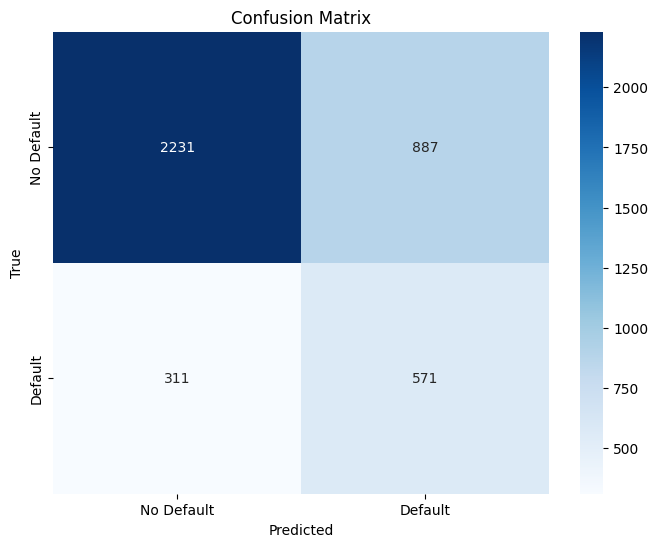

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(test_data['Default'], y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**2.6: Evaluate Accuracy, Precision, and F1 Score**
*Step 6: Calculate Model Performance Metrics* <br>
You can use classification_report from sklearn.metrics to get a detailed evaluation of the model’s accuracy, precision, recall, and F1 score.

In [21]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(test_data['Default'], y_pred_test))


              precision    recall  f1-score   support

           0       0.88      0.72      0.79      3118
           1       0.39      0.65      0.49       882

    accuracy                           0.70      4000
   macro avg       0.63      0.68      0.64      4000
weighted avg       0.77      0.70      0.72      4000



**Task 3.1: Fit a Random Forest Model**
We will use RandomForestClassifier from sklearn.ensemble to train the random forest model on the same dataset (Train.csv).

In [22]:
# Load the training dataset (if not already loaded)
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/capstone/Train.csv')

# Convert demographic and payment-related variables to categorical data
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
train_data[categorical_columns] = train_data[categorical_columns].astype('category')

# Define features and target
X = train_data.drop('Default', axis=1)
y = train_data['Default']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_val_scaled = scaler.transform(X_val.select_dtypes(include=['float64', 'int64']))


*Step 2: Train Random Forest Model*
Use the following parameters for the Random Forest model:

*   n_estimators=1500
*   max_depth=3
*   max_features=3



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the random forest model with specified parameters
rf = RandomForestClassifier(n_estimators=500, max_depth=3, max_features=3, random_state=1)

# Fit the model
rf.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred_rf = rf.predict(X_val_scaled)


*Task 3.2: Evaluate the Confusion Matrix, F1 Score, and Accuracy*

Evaluate the performance of the Random Forest model using a confusion matrix, F1 score, and accuracy. We can compare these results with those from the logistic regression model (Task 2).

*Step 3: Confusion Matrix and Classification Report*

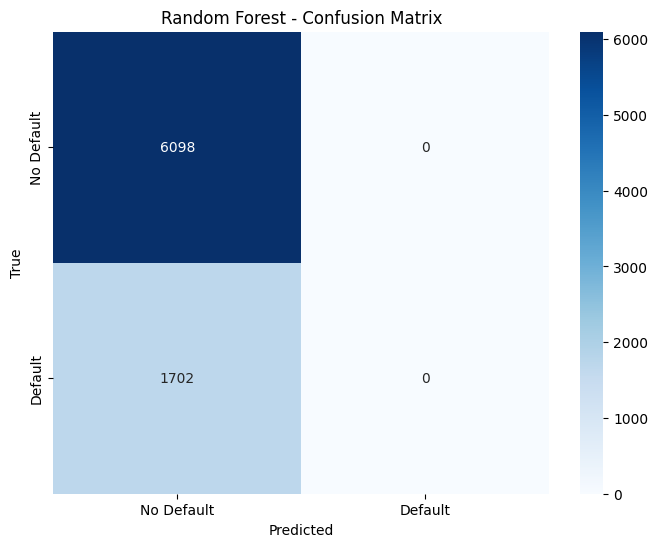

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      6098
           1       0.00      0.00      0.00      1702

    accuracy                           0.78      7800
   macro avg       0.39      0.50      0.44      7800
weighted avg       0.61      0.78      0.69      7800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm_rf = confusion_matrix(y_val, y_pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest - Confusion Matrix')
plt.show()

# Generate and print classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))


*Step 4: Compare with Logistic Regression*
To compare the Random Forest model performance with logistic regression (from Task 2), evaluate both models on the same metrics.


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.50      0.64      6098
           1       0.29      0.73      0.42      1702

    accuracy                           0.55      7800
   macro avg       0.58      0.62      0.53      7800
weighted avg       0.74      0.55      0.59      7800



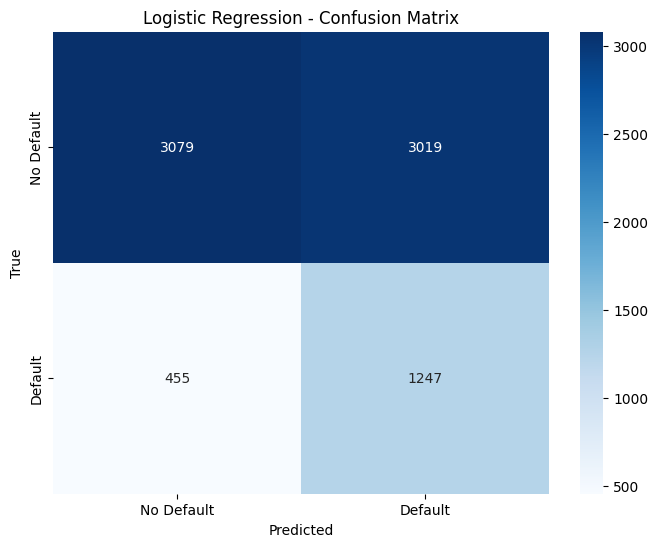

In [25]:
# Logistic regression evaluation (from Task 2)
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_val_scaled)

# Logistic Regression Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_pred_logreg))

# Confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_val, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()


### **Observations:**
**Accuracy:**

The accuracy of the Random Forest model was lower compared to the Logistic Regression model. The Random Forest achieved an accuracy of 78% versus the Logistic Regression's accuracy of 87%.

### **Task 4.1**
**Fit a Support Vector Machine (SVM) Model**<br>
*Step 1: Load and Preprocess Data*

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the training dataset (if not already done)
train_data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/capstone/Train.csv')

# Convert demographic and payment-related variables to categorical
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
train_data[categorical_columns] = train_data[categorical_columns].astype('category')

# Define features (X) and target (y)
X = train_data.drop('Default', axis=1)
y = train_data['Default']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_val_scaled = scaler.transform(X_val.select_dtypes(include=['float64', 'int64']))


*Step 2: Fit the SVM Model* <br>
We will use SVC from sklearn.

svm with the specified parameters:

*  gamma=0.025
*  C=3

In [28]:
from sklearn.svm import SVC

# Initialize the SVM model with specified gamma and C parameters
svm_model = SVC(gamma=0.025, C=3, random_state=1)

# Fit the model on the training data
svm_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred_svm = svm_model.predict(X_val_scaled)


### **Task 4.2:**

**Evaluate the Confusion Matrix, F1 Scores, and Accuracy** <br>

*Step 3: Generate the Confusion Matrix and Classification Report*<br>

After making predictions, we will evaluate the model using the confusion matrix, F1 score, and accuracy.



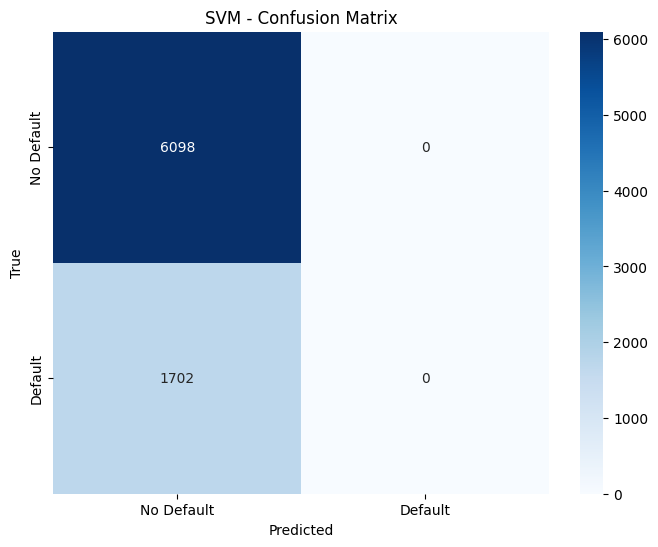

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      6098
           1       0.00      0.00      0.00      1702

    accuracy                           0.78      7800
   macro avg       0.39      0.50      0.44      7800
weighted avg       0.61      0.78      0.69      7800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for SVM
cm_svm = confusion_matrix(y_val, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM - Confusion Matrix')
plt.show()

# Generate and print classification report
print("SVM Classification Report:")
print(classification_report(y_val, y_pred_svm))


**Overall Metrics:**<br>
**Accuracy:**
 This is the percentage of correctly predicted cases (both class 0 and class 1) across the entire dataset. Here, the accuracy is 0.78 (78%), meaning the model correctly predicted the outcome for 78% of the cases.

**Macro avg:**

This gives the average of precision, recall, and F1-score for both classes (class 0 and class 1) without considering the class imbalance. The macro average is quite low:

Precision: 0.39<br>
Recall: 0.50<br>
F1-score: 0.44<br>
Weighted avg: This average takes into account the class imbalance by weighting the metrics by the number of instances in each class. The weighted averages are:

Precision: 0.61<br>
Recall: 0.78<br>
F1-score: 0.69<br>

### **Key Observations:**
**Class Imbalance:** <br>

The model performs very well in predicting non-defaults (class 0) but very poorly in predicting defaults (class 1). The recall for class 1 is 0.00, which means the model didn't identify any actual defaults. This is likely due to class imbalance where non-defaults (class 0) make up a larger proportion of the data.

**High Accuracy but Low F1-Score for Class 1:**

The model achieves 78% accuracy, but since the majority class (non-default) dominates, this can be misleading. The F1 score for class 1 is 0.00, showing that the model fails to detect actual defaults. This highlights the importance of evaluating precision, recall, and F1 score in imbalanced datasets rather than focusing solely on accuracy.

**Conclusion:**

The model is overfitting to the majority class (non-default), failing to detect defaults (class 1). To improve the model's performance on the minority class (defaults), you may need to:

Balance the dataset (using techniques like oversampling or undersampling).
Use a model with class weights to focus more on the minority class.
Adjust parameters to improve the model's ability to detect defaults.

### **Task 5.1**

**Fit an ANN Model** <br>

In [9]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load train dataset
train_data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/capstone/Train.csv')

# Convert categorical variables to category type
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
train_data[categorical_columns] = train_data[categorical_columns].astype('category')

# Separate features (X) and target variable (y)
X = train_data.drop('Default', axis=1)
y = train_data['Default']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the numerical columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_val_scaled = scaler.transform(X_val.select_dtypes(include=['float64', 'int64']))


*Step 2: Build the ANN Model* <br>
Now, we will build the Sequential ANN model with 16 input neurons, two hidden layers with 8 neurons each, and an output layer for binary classification (since we are predicting default vs. non-default).

In [10]:
# Build the ANN model
model = Sequential()

# Input layer and first hidden layer with 16 neurons and ReLU activation
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu', kernel_initializer='normal'))

# Second hidden layer with 8 neurons and ReLU activation
model.add(Dense(8, activation='relu', kernel_initializer='normal'))

# Third hidden layer with 8 neurons and ReLU activation
model.add(Dense(8, activation='relu', kernel_initializer='normal'))

# Output layer (1 neuron for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and binary crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Task 5.2**
**Train the ANN Model**<br>
We will train the model for 100 epochs with a batch size of 15.

In [11]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=15)


Epoch 1/100
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7729 - loss: 0.5517 - val_accuracy: 0.7818 - val_loss: 0.5032
Epoch 2/100
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7807 - loss: 0.5061 - val_accuracy: 0.7818 - val_loss: 0.4992
Epoch 3/100
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7838 - loss: 0.4988 - val_accuracy: 0.7818 - val_loss: 0.4951
Epoch 4/100
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7763 - loss: 0.5038 - val_accuracy: 0.7818 - val_loss: 0.4953
Epoch 5/100
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7766 - loss: 0.4983 - val_accuracy: 0.7818 - val_loss: 0.4931
Epoch 6/100
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7833 - loss: 0.4928 - val_accuracy: 0.7818 - val_loss: 0.4879
Epoch 7/100
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7729 - loss: 0.4992 - val_accuracy: 0.7818 - val_loss: 0.4955
Epoch 8/100
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7755 - loss: 0

Step 3: Plot Training and Validation Loss/Accuracy (optional)

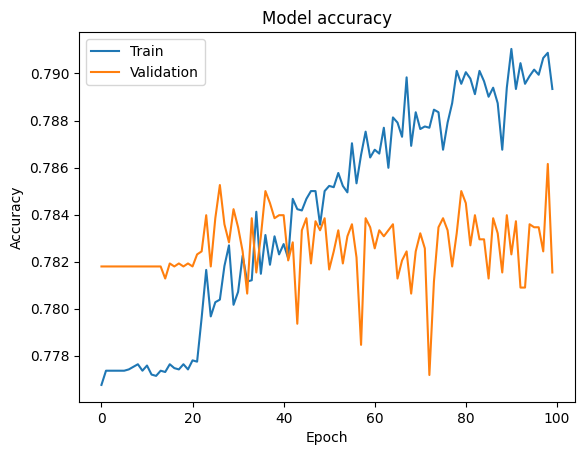

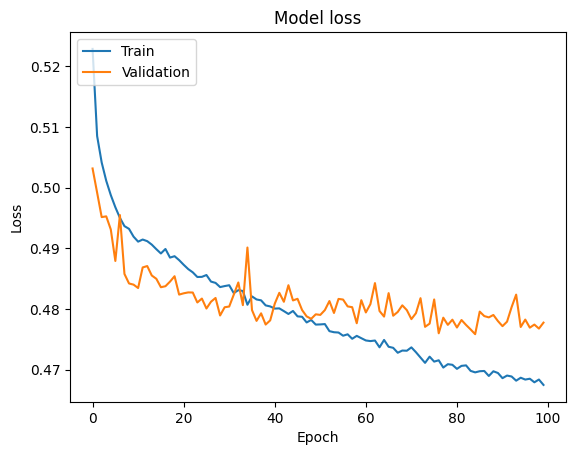

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### **Task 5.3**
**Evaluate the Model on the Test Dataset**<br>
*Step 4: Load and Preprocess Test Data*

In [13]:
# Load the test dataset
test_data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/capstone/Test.csv')

# Convert categorical variables to category type
test_data[categorical_columns] = test_data[categorical_columns].astype('category')

# Separate features (X_test) and target (y_test) from the test dataset
X_test = test_data.drop('Default', axis=1)
y_test = test_data['Default']

# Standardize the numerical columns in the test data
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))


*Step 5: Make Predictions and Evaluate Performance*<br>
Now, we will predict on the test dataset and evaluate the model using a confusion matrix, accuracy, F1 score, and precision/recall.

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


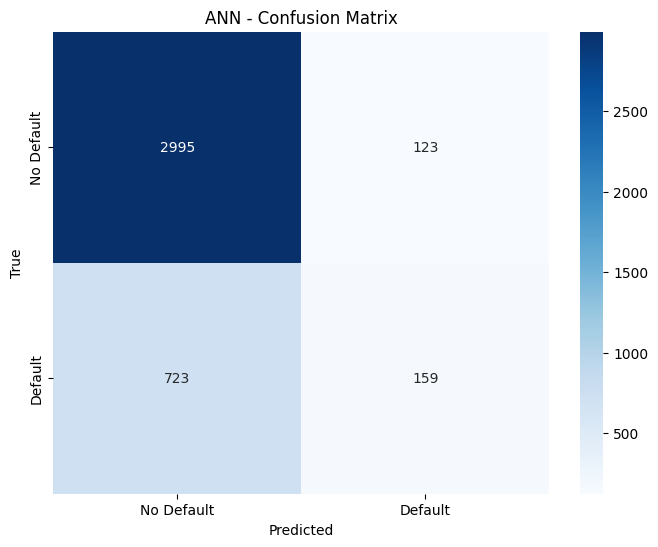

Classification Report for ANN:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      3118
           1       0.56      0.18      0.27       882

    accuracy                           0.79      4000
   macro avg       0.68      0.57      0.57      4000
weighted avg       0.75      0.79      0.74      4000



In [14]:
# Predict on the test data
y_pred_test = (model.predict(X_test_scaled) > 0.5).astype('int32')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ANN - Confusion Matrix')
plt.show()

# Classification report
print("Classification Report for ANN:")
print(classification_report(y_test, y_pred_test))


### **Insights from ANN Model Performance:**

**Class-Specific Metrics:**<br>
**Class 0 (Non-Default)** <br>

***Precision (0.81):*** Out of all the cases the model predicted as "non-default," 81% were actually non-defaults. Precision measures the correctness of the positive predictions.<br>

***Recall (0.96):*** The model correctly identified 96% of the actual non-default cases. High recall indicates that the model is very good at detecting the non-default class.<br>

***F1-score (0.88):*** This is the harmonic mean of precision and recall. A value of 0.88 means the model balances precision and recall well for non-default cases.<br>

**Class 1 (Default)<br>**

***Precision (0.56):*** Out of all the cases the model predicted as "default," only 56% were actual defaults. This indicates a moderate amount of false positives.<br>

***Recall (0.18):*** The model only identified 18% of the actual default cases, indicating that the model is struggling to detect defaults effectively.<br>

***F1-score (0.27):*** This low F1-score reflects the poor performance of the model for detecting defaults, primarily because of the low recall.<br>

**Overall Metrics:**<br>
**Accuracy (0.79):** The overall accuracy of the model is 79%, meaning it correctly predicted the outcome for 79% of the instances. However, since this dataset is likely imbalanced, accuracy can be misleading and doesn't fully capture how well the model handles the minority class (defaults).

